In [1]:
from dataloader import path2pixel, load_data
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
from classifiers.r_method import RMethodClassifier

In [3]:
cu_path = '/Users/zhengyun/Desktop/yaojian/data/20250905_150块铜矿石/Cu.png'
image = cv2.imread(cu_path, cv2.IMREAD_GRAYSCALE) 
m1 = path2pixel(cu_path, [50, -1, 350, 1200], max_len = 5, length=102, flip_hori=False,
               s_i = 1, th_val = 160, save_rock_image = False, direction = 'lrub', save_rock_pixels=False)

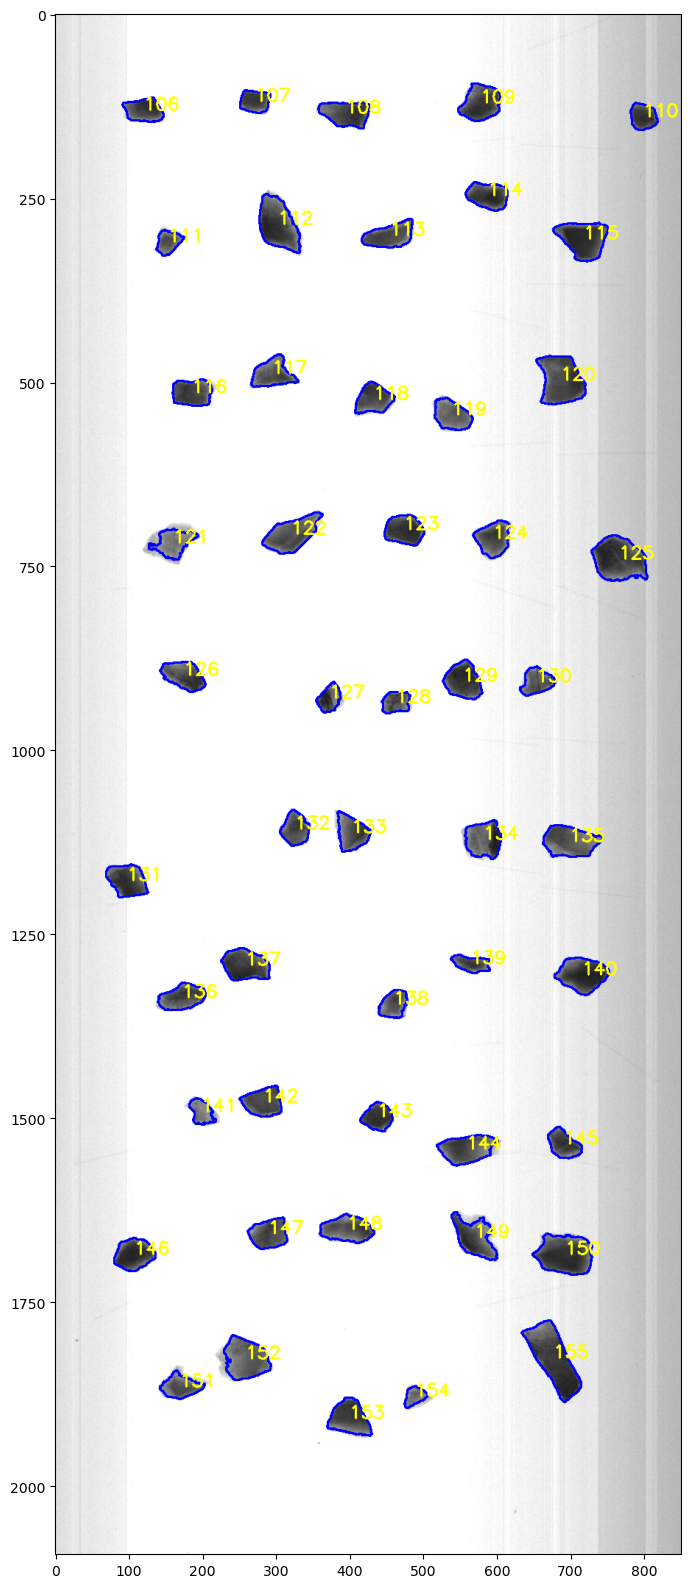

In [4]:
plt.figure(figsize = (10, 20))
plt.imshow(m1[3][4000:, :])

In [5]:
# 每隔5块石头倒序排列， 以将index与实际相对应
pixles = [[], []]
for i in range(int(150/5)):
    p_i = m1[2][0][i*5:(i+1)*5][::-1]
    pixles[0].extend(p_i)
    p_2 = m1[2][1][i*5:(i+1)*5][::-1]
    pixles[1].extend(p_2)

In [6]:
excel = '/Users/zhengyun/Desktop/yaojian/data/20250905_150块铜矿石/dexing_Copper_150.xlsx'
# Zn品位为0， 铅品位实际为铜的品位
input_cu = load_data(pixles, excel)


品位信息（加权平均）：
  - 铁品位：4.91% ± 2.70%
  - 锌品位：0.00% ± 0.00%
  - 铅品位：0.45% ± 0.88%
注：品位值为加权平均值，权重为矿石重量；± 后为标准差


In [13]:
R_cu = RMethodClassifier(pixels=input_cu[0], truth=input_cu[1], I0_low=195, I0_high=196, 
                           input= 'pixels', method= 'a', const= [5, 20], include_Fe = False)

# pre = R_cu.classify_ores(0.7, 0.2)
# print(R_cu.calculate_tuning_metrics(pre))

R_cu.tuning(min_recovery_rate=0.95, min_scrap_rate=0.2, A_range=np.arange(0.5, 1.2, 0.01), step_B=0.05, 
                  grade_real_th= 0.3/100.0, score_on=True, score_weight=True, check_metrics=True)


In [17]:
R_cu.best_metrics

{'抛废率': 90.03,
 '回收率': 38.27,
 '铅富集比': '3.84',
 '锌富集比': '0.00',
 '铅、锌、铁平均品位（所有）': '0.45%, 0.00%, 4.91%',
 '铅、锌、铁平均品位（保留）': '1.72%, 0.00%, 7.65%',
 '铅、锌、铁平均品位（抛废）': '0.31%, 0.00%, 4.61%',
 '准确率': 0.5866666666666667}

In [15]:
R_cu.pareto_front.filter(items = ['threshold_A', 'threshold_B', '抛废率', '回收率', '铅富集比',  '召回率', '召回率_重量'])


,threshold_A,threshold_B,抛废率,回收率,铅富集比,召回率,召回率_重量
0,0.60,0.85,0.12%,99.99%,1.00,1.000000,1.000000
1,0.63,0.05,0.71%,99.82%,1.01,1.000000,1.000000
2,0.59,0.95,1.24%,99.12%,1.00,0.985507,0.990861
6,0.61,0.60,2.86%,98.58%,1.01,0.985507,0.990046
9,0.61,0.65,2.98%,98.57%,1.02,0.985507,0.990046
10,0.61,0.70,3.48%,98.39%,1.02,0.971014,0.987039
17,0.64,0.05,3.78%,98.09%,1.02,0.971014,0.981139
19,0.63,0.25,4.02%,97.65%,1.02,0.956522,0.976171
21,0.63,0.30,4.37%,97.57%,1.02,0.956522,0.976171
24,0.62,0.55,5.34%,97.28%,1.03,0.956522,0.976171


In [10]:
R_cu.tuning_results.sort_values(by = '回收率')[-60:]

,threshold_A,threshold_B,抛废率,回收率,品位阈值,铅富集比,锌富集比,准确率,精确率,召回率,准确率_重量,精确率_重量,召回率_重量,准确率_品位,精确率_品位,召回率_品位
511,0.74,0.35,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
513,0.74,0.45,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
432,0.70,0.60,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
472,0.72,0.50,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
473,0.72,0.55,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
491,0.73,0.40,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
493,0.73,0.50,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
492,0.73,0.45,97.78%,9.96%,0.036825,4.49,0.00,0.813333,0.500000,0.035714,0.815504,0.376518,0.046675,0.406010,0.940719,0.098639
420,0.70,0.00,19.48%,90.94%,0.004225,1.13,0.00,0.413333,0.222222,0.857143,0.349596,0.207270,0.932236,0.711579,0.709551,0.946931
321,0.65,0.30,14.99%,92.90%,0.004230,1.09,0.00,0.366667,0.208696,0.857143,0.304622,0.196305,0.932236,0.694306,0.695791,0.946931


In [133]:
sorted['回收率']

1784     0.00%
2374     0.00%
2375     0.00%
2376     0.00%
2377     0.00%
         ...  
554     99.55%
665     99.82%
664     99.83%
553     99.98%
587     99.99%
Name: 回收率, Length: 3570, dtype: object